In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
data_path = "https://www.statlearning.com/s/Advertising.csv"

data = pd.read_csv(data_path,index_col = 0)

In [7]:
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


Text(0, 0.5, 'sales')

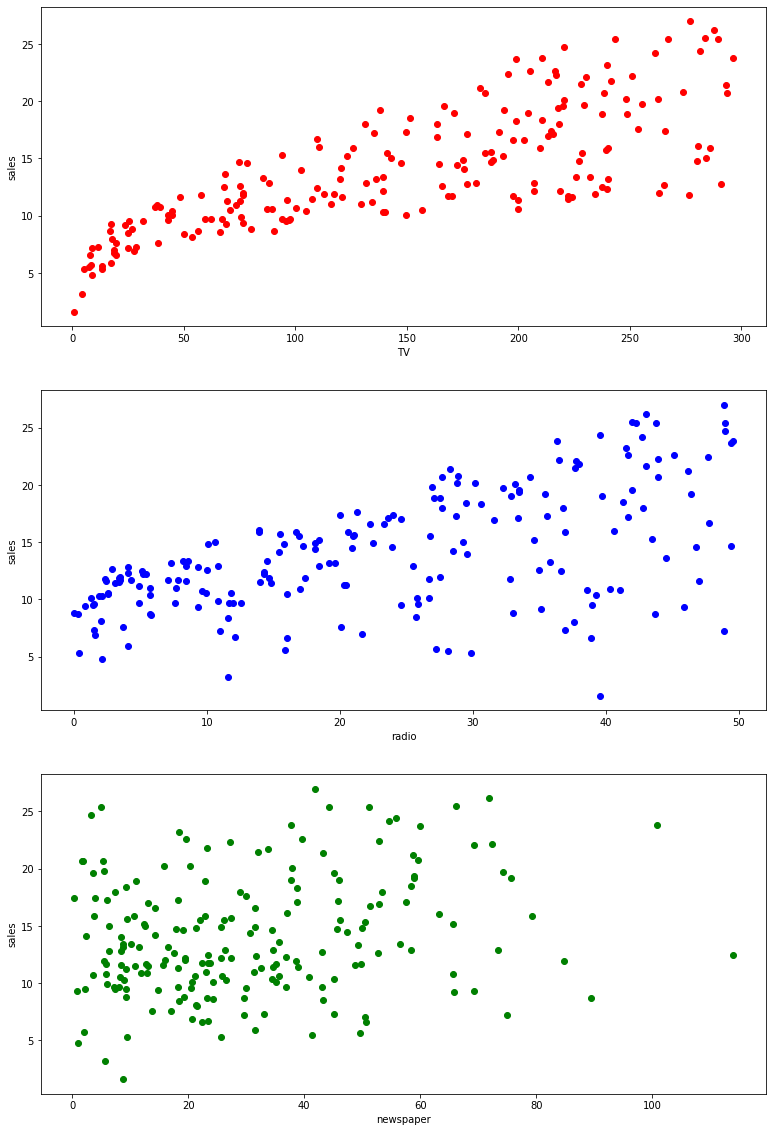

In [23]:
plt.figure(figsize=(13,20))
plt.subplot(3,1,1)
plt.scatter(data['TV'],data['sales'],c='r')
plt.xlabel('TV')
plt.ylabel('sales')
plt.subplot(3,1,2)
plt.scatter(data['radio'],data['sales'],c='b')
plt.xlabel('radio')
plt.ylabel('sales')
plt.subplot(3,1,3)
plt.scatter(data['newspaper'],data['sales'],c='green')
plt.xlabel('newspaper')
plt.ylabel('sales')

In [37]:
def calc_b(x_i,y_i):
    x_mean = x_i.mean()
    y_mean = y_i.mean()
    b1 = (((x_i-x_mean)*(y_i-y_mean)).sum())/(((x_i-x_mean)**2).sum())
    b0 = y_mean - b1*x_mean
    return b1,b0
    

In [38]:
b1_TV,b0_TV = calc_b(data['TV'],data['sales'])
b1_radio,b0_radio = calc_b(data['radio'],data['sales'])
b1_newspaper,b0_newspaper = calc_b(data['newspaper'],data['sales'])


In [39]:
def pred(b1,b0,x_i):
    return b0+np.dot(x_i,b1)

In [42]:
y_tv = pred(b1_TV,b0_TV,data['TV'])
y_radio = pred(b1_radio,b0_radio,data['radio'])
y_newspaper = pred(b1_newspaper,b0_newspaper,data['newspaper'])

Text(0, 0.5, 'sales')

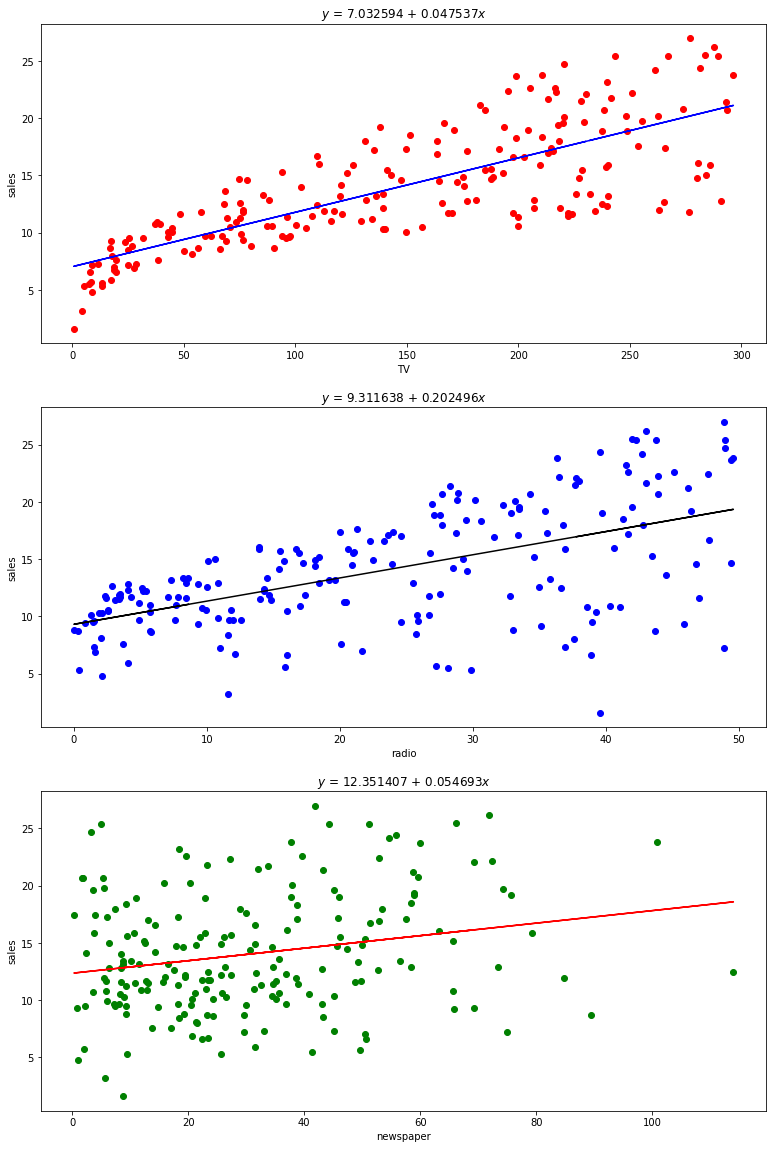

In [44]:
plt.figure(figsize=(13,20))

plt.subplot(3,1,1)
plt.scatter(data['TV'],data['sales'],c='r')
plt.title((("$y$ = %3f + %3f$x$" %(b0_TV, b1_TV))))
plt.plot(data['TV'],y_tv,c='b')
plt.xlabel('TV')
plt.ylabel('sales')

plt.subplot(3,1,2)
plt.scatter(data['radio'],data['sales'],c='b')
plt.title((("$y$ = %3f + %3f$x$" %(b0_radio, b1_radio))))
plt.plot(data['radio'],y_radio,c='black')
plt.xlabel('radio')
plt.ylabel('sales')


plt.subplot(3,1,3)
plt.scatter(data['newspaper'],data['sales'],c='green')
plt.title((("$y$ = %3f + %3f$x$" %(b0_newspaper, b1_newspaper))))
plt.plot(data['newspaper'],y_newspaper,c='red')
plt.xlabel('newspaper')
plt.ylabel('sales')

In [74]:
data1 = data[['TV','radio']]
data2 = data[['TV','radio','sales']]
y = data['sales']
data1.head(),data2.head()

(      TV  radio
 1  230.1   37.8
 2   44.5   39.3
 3   17.2   45.9
 4  151.5   41.3
 5  180.8   10.8,
       TV  radio  sales
 1  230.1   37.8   22.1
 2   44.5   39.3   10.4
 3   17.2   45.9    9.3
 4  151.5   41.3   18.5
 5  180.8   10.8   12.9)

In [193]:
X = data1

X

array([[  1. , 230.1,  37.8],
       [  1. ,  44.5,  39.3],
       [  1. ,  17.2,  45.9],
       [  1. , 151.5,  41.3],
       [  1. , 180.8,  10.8],
       [  1. ,   8.7,  48.9],
       [  1. ,  57.5,  32.8],
       [  1. , 120.2,  19.6],
       [  1. ,   8.6,   2.1],
       [  1. , 199.8,   2.6],
       [  1. ,  66.1,   5.8],
       [  1. , 214.7,  24. ],
       [  1. ,  23.8,  35.1],
       [  1. ,  97.5,   7.6],
       [  1. , 204.1,  32.9],
       [  1. , 195.4,  47.7],
       [  1. ,  67.8,  36.6],
       [  1. , 281.4,  39.6],
       [  1. ,  69.2,  20.5],
       [  1. , 147.3,  23.9],
       [  1. , 218.4,  27.7],
       [  1. , 237.4,   5.1],
       [  1. ,  13.2,  15.9],
       [  1. , 228.3,  16.9],
       [  1. ,  62.3,  12.6],
       [  1. , 262.9,   3.5],
       [  1. , 142.9,  29.3],
       [  1. , 240.1,  16.7],
       [  1. , 248.8,  27.1],
       [  1. ,  70.6,  16. ],
       [  1. , 292.9,  28.3],
       [  1. , 112.9,  17.4],
       [  1. ,  97.2,   1.5],
       [  

In [214]:
def find_beta(X,y):
    X = np.c_[np.ones((len(X), 1)), X] 
    inv = np.linalg.inv(X.T@X)
    beta_cap = inv @ X.T @ y
    return X,beta_cap

In [215]:
X1, beta_cap_1 = find_beta(data1,y)
X2, beta_cap_2 = find_beta(data2,y)

In [216]:
y_cap1 = X1@beta_cap_1
y_cap1

array([20.55546463, 12.34536229, 12.33701773, 17.61711596, 13.22390813,
       12.51208449, 11.71821241, 12.10551553,  3.7093792 , 12.55169696,
        7.0358597 , 17.25652015, 10.60866187,  8.81095051, 18.44466773,
       20.82891539, 12.90386507, 23.24107626,  9.94121476, 14.15384619,
       18.12139161, 14.74206357,  6.51417168, 16.54402663,  8.14035215,
       15.6080206 , 14.96769383, 17.0463346 , 19.39954145,  9.15929748,
       21.64292187, 11.35791808,  7.65045928, 18.83346334,  7.56302763,
       16.99280099, 23.36720719, 15.6258994 ,  9.91257829, 20.4405801 ,
       16.37872122, 17.29870935, 21.5621537 , 13.96692266,  8.9009974 ,
       15.16263814,  8.88644967, 21.69944046, 16.28690268,  8.18162949,
       12.64569407,  9.31962792, 20.66180115, 19.96126242, 20.35512357,
       21.30864743,  8.53774783, 12.76239488, 21.89072858, 18.10746914,
        5.74497097, 22.90418658, 16.78413768, 13.18474853, 16.96570907,
        7.82652846,  8.98703456, 12.02066194, 18.95313425, 21.09

In [217]:
y_cap_2 = X2@beta_cap_2
y_cap_2

array([22.1, 10.4,  9.3, 18.5, 12.9,  7.2, 11.8, 13.2,  4.8, 10.6,  8.6,
       17.4,  9.2,  9.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. , 12.5,
        5.6, 15.5,  9.7, 12. , 15. , 15.9, 18.9, 10.5, 21.4, 11.9,  9.6,
       17.4,  9.5, 12.8, 25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7, 12.9,
        8.5, 14.9, 10.6, 23.2, 14.8,  9.7, 11.4, 10.7, 22.6, 21.2, 20.2,
       23.7,  5.5, 13.2, 23.8, 18.4,  8.1, 24.2, 15.7, 14. , 18. ,  9.3,
        9.5, 13.4, 18.9, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 11. , 11.8, 12.3, 11.3, 13.6, 21.7, 15.2, 12. , 16. ,
       12.9, 16.7, 11.2,  7.3, 19.4, 22.2, 11.5, 16.9, 11.7, 15.5, 25.4,
       17.2, 11.7, 23.8, 14.8, 14.7, 20.7, 19.2,  7.2,  8.7,  5.3, 19.8,
       13.4, 21.8, 14.1, 15.9, 14.6, 12.6, 12.2,  9.4, 15.9,  6.6, 15.5,
        7. , 11.6, 15.2, 19.7, 10.6,  6.6,  8.8, 24.7,  9.7,  1.6, 12.7,
        5.7, 19.6, 10.8, 11.6,  9.5, 20.8,  9.6, 20.7, 10.9, 19.2, 20.1,
       10.4, 11.4, 10.3, 13.2, 25.4, 10.9, 10.1, 16